<a href="https://colab.research.google.com/github/anoldKupara/Machine-Learning-Course/blob/main/_Classification_on_Wine_DATA_SET_Using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
wine = datasets.load_wine()

In [3]:
x = wine.data
y = wine.target

In [4]:
################################################################### how to train and split

from sklearn.model_selection import train_test_split

In [5]:
#####################  choosing 2 features 
X=x[:,6:8]
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [6]:
from sklearn import svm
from sklearn.svm import SVC

In [7]:
######### predict using kernel = 'linear'
classification1=svm.SVC(kernel='linear')  
classification1.fit(x_train,y_train)
linear = classification1.predict(x_test)

In [8]:
linear

array([2, 1, 2, 1, 0, 0, 1, 1, 1, 2, 2, 0, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1,
       0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 1, 1, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0,
       0, 1, 1, 2, 1, 0, 1, 0, 0, 2])

In [9]:
############ predict using kernel = 'polynomial'
classification2=svm.SVC(kernel='poly',degree=3)
classification2.fit(x_train,y_train)
non_linear1= classification2.predict(x_test)

In [10]:
non_linear1

array([2, 2, 2, 1, 0, 0, 1, 1, 1, 2, 2, 0, 1, 0, 2, 1, 0, 1, 1, 2, 0, 1,
       1, 0, 1, 2, 2, 1, 0, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0,
       1, 1, 1, 2, 1, 0, 1, 1, 0, 2])

In [11]:

############## predict using kernel = 'rbf'
classification3=svm.SVC(kernel='rbf')
classification3.fit(x_train,y_train)
non_linear2= classification3.predict(x_test)

In [12]:
non_linear2

array([2, 1, 2, 1, 0, 0, 1, 1, 1, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0, 2, 0, 1,
       0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 1, 1, 2, 0, 2, 0, 1, 2, 0, 2, 0, 0,
       0, 1, 0, 2, 1, 0, 1, 0, 0, 2])

In [13]:
############# imporing confusion_matrix and Classfication_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [14]:
############ confusion matrix for kernel = 'linear'
confusion_matrix(y_test,linear)

array([[14,  4,  0],
       [ 6, 14,  1],
       [ 0,  2, 13]])

In [15]:
target=wine.target_names
classification_report(y_test,linear,target_names=target)

'              precision    recall  f1-score   support\n\n     class_0       0.70      0.78      0.74        18\n     class_1       0.70      0.67      0.68        21\n     class_2       0.93      0.87      0.90        15\n\n    accuracy                           0.76        54\n   macro avg       0.78      0.77      0.77        54\nweighted avg       0.76      0.76      0.76        54\n'

In [16]:
############# confusion matrix for kernel ='polynomial'
confusion_matrix(y_test,non_linear1)

array([[11,  7,  0],
       [ 3, 17,  1],
       [ 0,  1, 14]])

In [17]:
classification_report(y_test,non_linear1,target_names=target)

'              precision    recall  f1-score   support\n\n     class_0       0.79      0.61      0.69        18\n     class_1       0.68      0.81      0.74        21\n     class_2       0.93      0.93      0.93        15\n\n    accuracy                           0.78        54\n   macro avg       0.80      0.78      0.79        54\nweighted avg       0.79      0.78      0.78        54\n'

In [18]:
##################### confusion matrix for kernel = 'rbf'
confusion_matrix(y_test,non_linear2)

array([[16,  2,  0],
       [ 7, 13,  1],
       [ 0,  3, 12]])

In [19]:
print(classification_report(y_test,non_linear2,target_names=target))

              precision    recall  f1-score   support

     class_0       0.70      0.89      0.78        18
     class_1       0.72      0.62      0.67        21
     class_2       0.92      0.80      0.86        15

    accuracy                           0.76        54
   macro avg       0.78      0.77      0.77        54
weighted avg       0.77      0.76      0.76        54



Automatically created module for IPython interactive environment


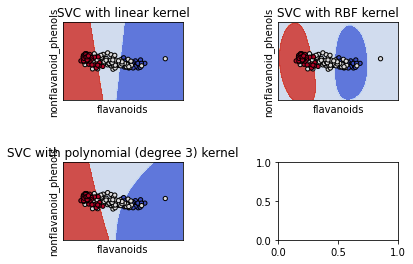

In [20]:
####################### plotting the classifier in 2d projection
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.8, hspace=0.8)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.9)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=18, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('flavanoids')
    ax.set_ylabel('nonflavanoid_phenols')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()